# Task 3: Decision Tree Classifier
---
In this project, we'll look at the implementation of a multi-class decision tree classifier which we will use on the UCI-ML Iris dataset.

### Importing Project Dependencies-
---

In [84]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the iris dataset
iris = datasets.load_iris()

# Forming the iris dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
y = iris.target
print(y)
print('Total data instances = {}'.format(len(df)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Total data instances = 150


As we can see, the dataset contains around 150 instances of data. Let's split the data into training and validation splits so that we can test how our model generalizes to the training data.

In [86]:
from sklearn.model_selection import train_test_split as Tts
x_train, x_test, y_train, y_test = Tts(df, y, test_size = 0.2, random_state=2)

len(x_train), len(y_train), len(x_test), len(y_test)

(120, 120, 30, 30)

### Defining the Decision Tree Classifier
---
In this section, we will create a simple decision tree classifier with the default hyperparameter values and then we'll test the inference performance for this tree.

In [87]:
# Defining the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualizing the Decision Tree



In [88]:
# Installing the required libraries
!pip install pydotplus --quiet
!apt-get install graphviz -y --quiet

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


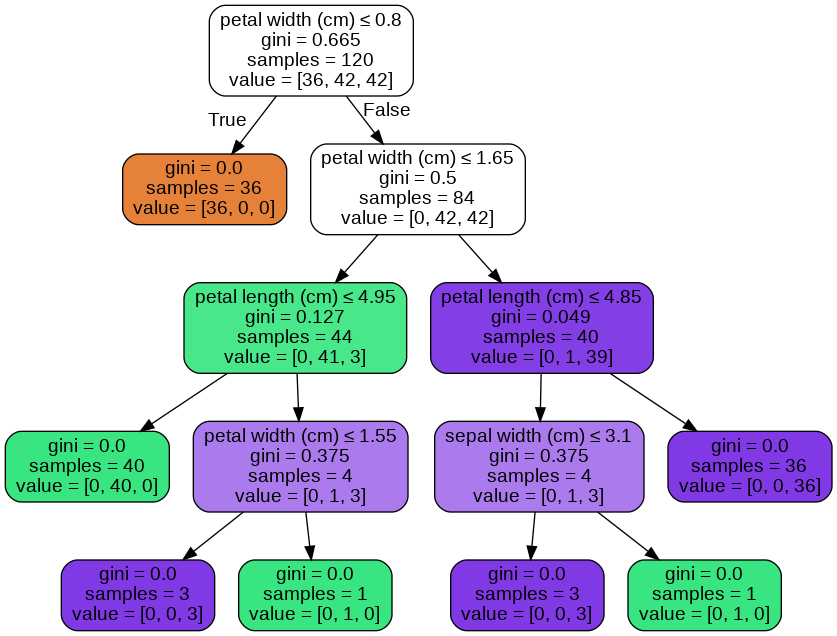

In [89]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(treeClassifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

We have successfully created and visualized our basic Decision Tree Classifier. Now, let's observe how our model performs on the test set. 

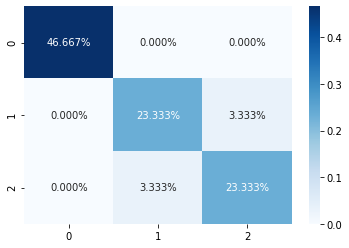

Accuracy = 93.33%


In [90]:
from sklearn.metrics import confusion_matrix # to generate the confusion matrix for the predictions
from sklearn.metrics import accuracy_score # scoring function for our model
import seaborn as sns
import matplotlib

y_preds = treeClassifier.predict(x_test) # using the decision tree classifier to make predictions on the test set
cf_matrix = confusion_matrix(y_preds, y_test) # creating the confusion matrix for the predicted values and the actual values
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, # plotting the confusion matrix
            fmt='.3%', cmap='Blues')
plt.show()

print('Accuracy = {:.2f}%'.format(accuracy_score(y_test, y_preds)*100))

As we can see, we got around 93.33% accuracy with our model. Now, let's see if we can improve this performance.

We will use a technique called pruning where the depth of the decision tree classifier is reduced in order to prevent overfitting, which generally hurts the generalization capability of the model, thus resulting in a poor performance for inference on unseen data.

In order to find the optimum depth for our tree, we will use the Grid Search CV algorithm.

In [100]:
from sklearn.model_selection import GridSearchCV

# specifying a range of depth values to experiment with
param_grid = {'max_depth': np.arange(1, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(x_train, y_train)
print('Best depth hyperparameter = ', tree.best_params_)

Best depth hyperparameter =  {'max_depth': 4}


As we can see, best hyperparameter for maximum tree depth was estimated to 4. The max_depth for our original classifier was also 4. So let us finally train the model with max_depth = 3 (one less than the original) and test it's performance.

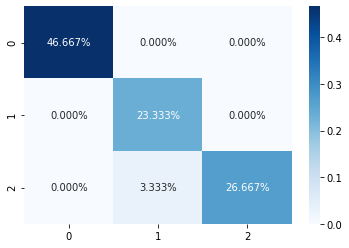

Accuracy = 96.67%


In [101]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier2 = DecisionTreeClassifier(max_depth = 3)
treeClassifier2.fit(x_train, y_train)

# model evaluation
y_preds = treeClassifier2.predict(x_test) # using the decision tree classifier to make predictions on the test set
cf_matrix = confusion_matrix(y_preds, y_test) # creating the confusion matrix for the predicted values and the actual values
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, # plotting the confusion matrix
            fmt='.3%', cmap='Blues')
plt.show()

print('Accuracy = {:.2f}%'.format(accuracy_score(y_test, y_preds)*100))

As we can see, the model accuracy went up by 3.33 percent, which is a considerable increase in the model's performance. Finally let us visualize our final decision tree classifier.

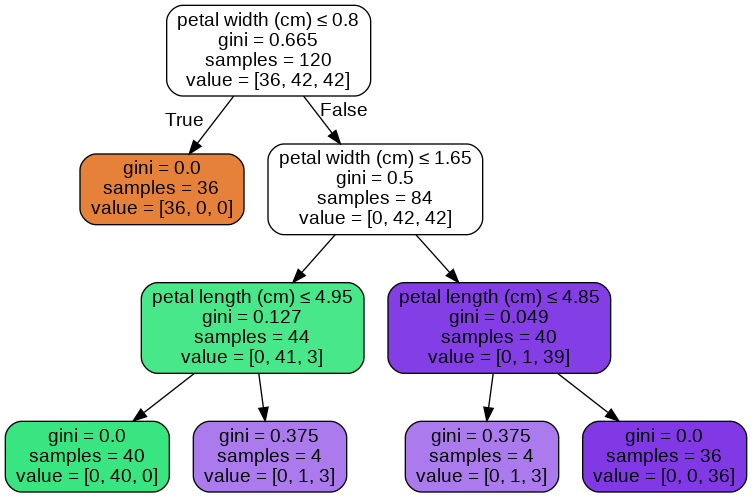

In [102]:
dot_data = StringIO()
export_graphviz(treeClassifier2, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

With this, we come to the end of this project.